# Contents
01.	Import Libraries
02.	Import Dataframe
03.	Create a Region Variable
04.	Crossing Region with Spending Flag
05.	Creating Exclusion Flag for Low Activity Customers
06.	Creating Customer Profiling Variables
07.	Creating Visualizations of New Variables
08.	Aggregating on Customer Level
09.	Mapping Department Name to Department ID
10.	Crossing Departments with New Variables
11.	Crossing Days Since Last Order with New Variables
12.	Crossing Prices with New Variables
13.	Crossing Order Hour of Day with New Variables
14.	Crossing Loyalty Flag with New Variables
15.	Exporting Final Data Set


# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframe

In [2]:
# Set File Path
path = r'C:\Users\Campa\Data Projects\Instacart Basket Project'

In [3]:
# Import Cust_Ords_Prods_Merged.pkl
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Cust_Ords_Prods_Merged.pkl'))

In [4]:
# Check DF shape
cust_ords_prods.shape

(32404859, 31)

In [5]:
cust_ords_prods.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,Marital Status,income,...,aisle_id,department_id,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,Average_spending,Spending_Flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,Mid-Range Product,Least Busy,Most Orders,8,New customer,7.988889,Low Spender


In [6]:
cust_ords_prods.dtypes

user_id                    int64
First Name                object
Last Name                 object
Gender                    object
STATE                     object
Age                        int64
date_joined               object
n_dependants               int64
Marital Status            object
income                     int64
Unnamed: 0_x               int64
order_id                   int64
order_number               int64
order_day_of_week          int64
order_hour_of_day          int64
days_since_last_order    float64
product_id                 int64
add_to_cart_order          int64
reordered                  int64
Unnamed: 0_y               int64
product_name              object
aisle_id                   int64
department_id              int64
prices                   float64
price_range_loc           object
Busiest Days              object
busiest_period_of_day     object
max_order                  int64
loyalty_flag              object
Average_spending         float64
Spending_F

In [7]:
#remove unnecessary column
cust_ords_prods['Unnamed: 0_x'].head()

0    443895
1    443897
2    443898
3    443892
4    443893
Name: Unnamed: 0_x, dtype: int64

In [8]:
cust_ords_prods = cust_ords_prods.drop(columns = ['Unnamed: 0_x'])

In [9]:
cust_ords_prods.shape

(32404859, 30)

# 03. Create a Region Variable

In [10]:
#Create region column
result = []

for value in cust_ords_prods["STATE"]:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virgina', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("South")
    else:
        result.append("West")


In [11]:
cust_ords_prods['Region'] = result

In [12]:
cust_ords_prods['Region'].value_counts()

South        10150464
West          8934334
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

# 04. Crossing Region with Spending Flag

In [13]:
#crossing region tag with spending tag
crosstab = pd.crosstab(cust_ords_prods['Region'], cust_ords_prods['Spending_Flag'], dropna = False)

In [14]:
crosstab

Spending_Flag,High Spender,Low Spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,193681,9956783
West,176364,8757970


# 05. Creating Exclusion Flag for Low Activity Customers

In [15]:
# Create Exclusion flag
cust_ords_prods.loc[cust_ords_prods['max_order'] < 5, 'activity'] = 'low'
cust_ords_prods.loc[cust_ords_prods['max_order'] >= 5, 'activity'] = 'normal'

In [16]:
#Checking value counts of exclusion flag
cust_ords_prods['activity'].value_counts()

normal    30964564
low        1440295
Name: activity, dtype: int64

In [17]:
#Checking length of of new column
len(cust_ords_prods['activity'])

32404859

In [18]:
#Creating a dataframe containin only the low activity customers
df_low = cust_ords_prods[cust_ords_prods['activity'] == 'low']

In [19]:
df_low.shape

(1440295, 32)

In [20]:
df_low.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,Marital Status,income,...,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,Average_spending,Spending_Flag,Region,activity
729,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,9.0,Mid-Range Product,Regularly Busy,Average Orders,3,New customer,7.485714,Low Spender,South,low
730,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,9.0,Mid-Range Product,Least Busy,Most Orders,3,New customer,7.485714,Low Spender,South,low
731,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,4.3,Low-range product,Busiest Day,Average Orders,3,New customer,7.485714,Low Spender,South,low
732,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,8.2,Mid-Range Product,Regularly Busy,Average Orders,3,New customer,7.485714,Low Spender,South,low
733,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,8.2,Mid-Range Product,Least Busy,Most Orders,3,New customer,7.485714,Low Spender,South,low


In [21]:
#Exporting low activity sampe as pkl
df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customer_data.pkl'))

In [22]:
#Creating a dataframe containing only regular activity customers
df_reg = cust_ords_prods[cust_ords_prods['activity'] == 'normal']


In [23]:
df_reg.shape

(30964564, 32)

In [24]:
df_reg.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,Marital Status,income,...,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,Average_spending,Spending_Flag,Region,activity
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-Range Product,Least Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal


# 06. Creating Customer Profiling Variables

In [25]:
# Creating variable for age
df_reg.loc[(df_reg['Age'] >= 18) & (df_reg['Age'] < 25), 'Age_Group'] = 'College Age'
df_reg.loc[(df_reg['Age'] >= 25) & (df_reg['Age'] < 40), 'Age_Group'] = 'Early Career'
df_reg.loc[(df_reg['Age'] >= 40) & (df_reg['Age'] < 65), 'Age_Group'] = 'Middle Age'
df_reg.loc[df_reg['Age'] >= 65, 'Age_Group'] = 'Retirement Age'

C:\Users\campa\AppData\Local\Temp\ipykernel_16604\3095831854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.loc[(df_reg['Age'] >= 18) & (df_reg['Age'] < 25), 'Age_Group'] = 'College Age'


In [26]:
df_reg.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,Marital Status,income,...,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,Average_spending,Spending_Flag,Region,activity,Age_Group
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-Range Product,Busiest Day,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-Range Product,Regularly Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-Range Product,Least Busy,Most Orders,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age


In [27]:
df_reg['Age_Group'].value_counts()

Middle Age        12103910
Retirement Age     8195544
Early Career       7249916
College Age        3415194
Name: Age_Group, dtype: int64

In [28]:
#Creating a variable for family status using dept 18 'babies' to identify 
df_reg.loc[(df_reg['department_id'] == 18) & (df_reg['n_dependants'] > 0), 'family_status'] = 'young children'
df_reg.loc[(df_reg['department_id'] != 18) & (df_reg['n_dependants'] >0), 'family_status'] = 'older children'
df_reg.loc[df_reg['n_dependants'] == 0, 'family_status'] = 'no children'           

C:\Users\campa\AppData\Local\Temp\ipykernel_16604\3842956786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.loc[(df_reg['department_id'] == 18) & (df_reg['n_dependants'] > 0), 'family_status'] = 'young children'


In [29]:
df_reg['family_status'].value_counts()

older children    22917819
no children        7739681
young children      307064
Name: family_status, dtype: int64

In [30]:
#Creating Variable for work status
df_reg.loc[(df_reg['income'] < 100000) & (df_reg['Age'] < 25), 'work_status'] = 'student'
df_reg.loc[(df_reg['income'] < 100000) & (df_reg['Age'] > 64), 'work_status'] = 'retired'
df_reg.loc[(df_reg['income'] >= 100000) & (df_reg['income'] < 300000), 'work_status'] = 'mid income'
df_reg.loc[df_reg['income'] >= 300000, 'work_status'] = 'high income'
df_reg.loc[(df_reg['income'] < 100000) & (df_reg['Age'] >= 25) & (df_reg['Age'] <= 64), 'work_status'] = 'low income' 

C:\Users\campa\AppData\Local\Temp\ipykernel_16604\666836674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.loc[(df_reg['income'] < 100000) & (df_reg['Age'] < 25), 'work_status'] = 'student'


In [31]:
df_reg['work_status'].value_counts()

mid income     14107373
low income     10999010
student         3304371
retired         2453781
high income      100029
Name: work_status, dtype: int64

In [32]:
df_reg.columns

Index(['user_id', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'Marital Status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'Busiest Days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'Average_spending', 'Spending_Flag', 'Region',
       'activity', 'Age_Group', 'family_status', 'work_status'],
      dtype='object')

# 07. Creating Visualizations of New Variables

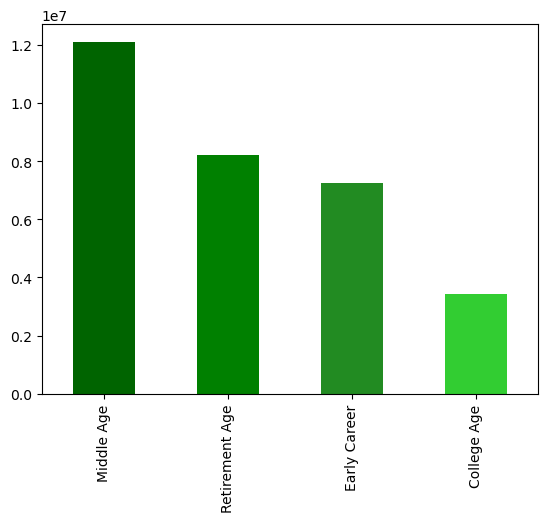

In [33]:
#creatiing bar graph of age groups
Age_bar = df_reg['Age_Group'].value_counts().plot.bar(color = ['darkgreen', 'green', 'forestgreen', 'limegreen'])

In [161]:
#Exporting age bar graph
Age_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'age_bar.png')), bbox_inches = "tight")

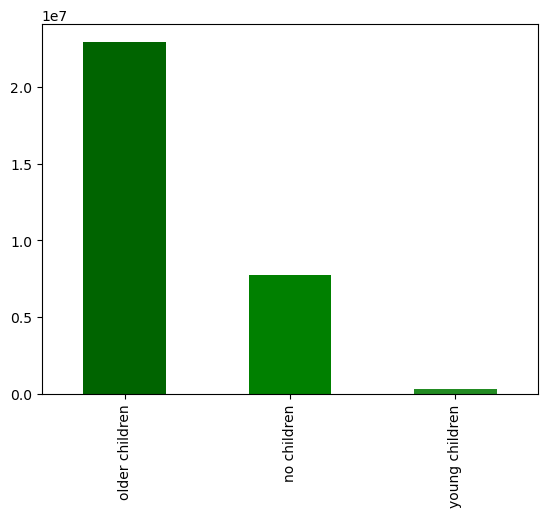

In [35]:
#Creating bar graph of family stati
Fam_bar = df_reg['family_status'].value_counts().plot.bar(color = ['darkgreen', 'green', 'forestgreen'])

In [165]:
#Exporting family status bar graph
Fam_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'fam_bar.png')), bbox_inches = "tight")

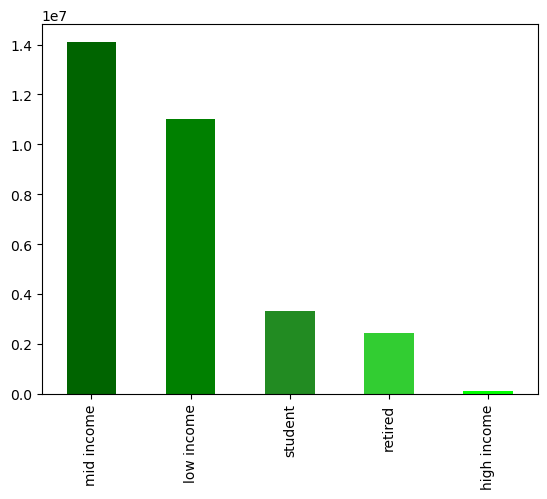

In [37]:
#Creating Bar Graph of Work Stati
wrk_stat_bar = df_reg['work_status'].value_counts().plot.bar(color = ['darkgreen', 'green', 'forestgreen', 'limegreen', 'lime'])

In [167]:
#Exporting Work Status Bar Graph
wrk_stat_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'wrk_bar.png')), bbox_inches = "tight")

# 08. Aggregating On Customer Level

In [39]:
#Creating crosstab of region and age group
Age_Reg = pd.crosstab(df_reg['Region'], df_reg['Age_Group'])

In [40]:
Age_Reg

Age_Group,College Age,Early Career,Middle Age,Retirement Age
Region,,,,
Midwest,791626,1691375,2874466,1904046
Northeast,602790,1268947,2108141,1484807
South,1098370,2300954,3753066,2545172
West,922408,1988640,3368237,2261519


In [41]:
#Copying crosstab to clipboard
Age_Reg.to_clipboard()

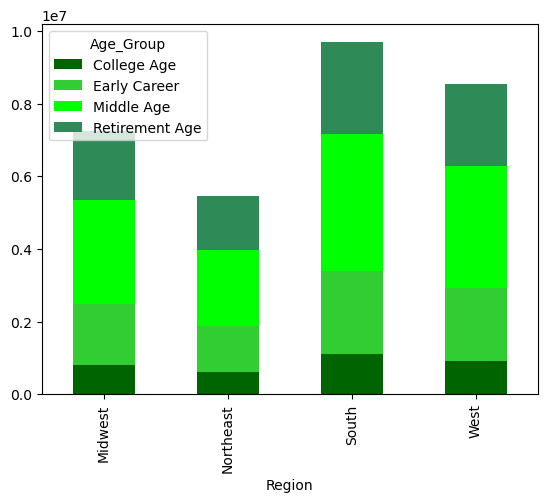

In [42]:
#Creating Bar Graph of Age Groups by Region
age_reg_bar = Age_Reg.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'lime', 'seagreen'])

In [162]:
#Exporting Age by Region Bar Graph
age_reg_bar.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'age_reg_bar.png')), bbox_inches = "tight")

In [44]:
#Creating Crosstab of Family Stati by Age Group
Age_fam = pd.crosstab(df_reg['Age_Group'], df_reg['family_status'])

In [45]:
Age_fam

family_status,no children,older children,young children
Age_Group,,,
College Age,825510,2555082,34602
Early Career,1835065,5344321,70530
Middle Age,3057148,8925142,121620
Retirement Age,2021958,6093274,80312


In [46]:
#Exporting Family-Age Crosstab to clipboard
Age_fam.to_clipboard()

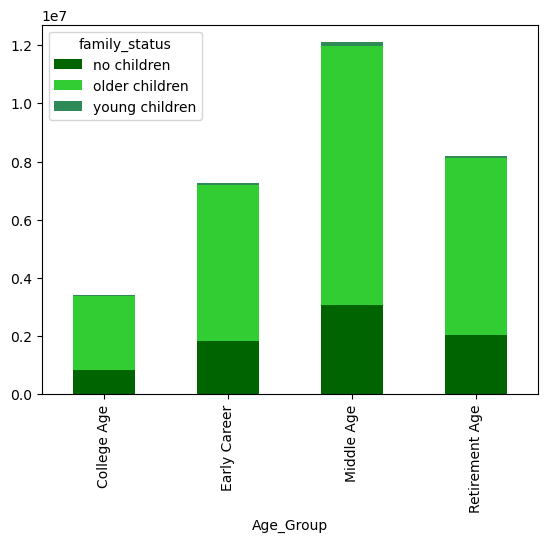

In [47]:
#Creating Bar Graph of Family Stati by Age
Age_fam_bar = Age_fam.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'seagreen', 'lime'])

In [164]:
#Exporting Bar Graph of family stati by Age Group
Age_fam_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_bar.png'), bbox_inches = "tight")

In [49]:
#Creating crosstab of income levels by Region
reg_wrk = pd.crosstab(df_reg['Region'], df_reg['work_status'])

In [50]:
reg_wrk

work_status,high income,low income,mid income,retired,student
Region,,,,,
Midwest,30583,2535843,3369510,565818,759759
Northeast,15435,1917716,2501049,441203,589282
South,26833,3491652,4346369,769737,1062971
West,27178,3053799,3890445,677023,892359


In [51]:
#Copying Crosstab of income levels by region to cliboard
reg_wrk.to_clipboard()

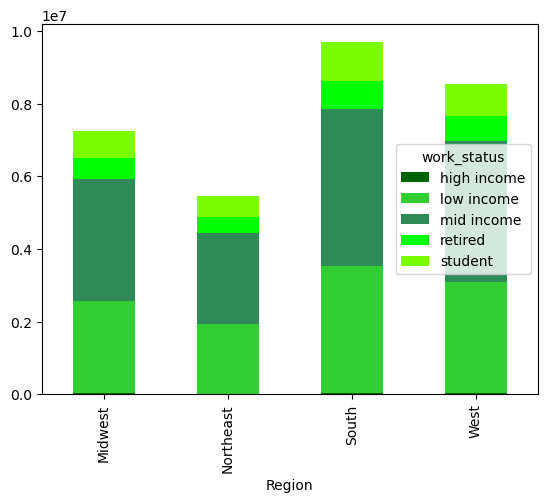

In [52]:
#creating bar graph of income levels by region
reg_wrk_bar = reg_wrk.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'seagreen', 'lime', 'lawngreen'])

In [147]:
#Exporting bar graph of income levels by region
reg_wrk_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'reg_wrk_bar.png')), bbox_inches = "tight")

# 09. Mapping Department Name to Department ID

In [54]:
#importing departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [55]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [56]:
#renaming column to creat merge key
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [57]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [58]:
#creating data dictionary
zipped = zip(df_dept['department_id'], df_dept['department'])

In [59]:
data_dict = dict(zipped)

In [60]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [61]:
#mapping data dictionary onto main dataframe
df_reg['department'] = df_reg['department_id'].map(data_dict)

C:\Users\campa\AppData\Local\Temp\ipykernel_16604\1413058256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['department'] = df_reg['department_id'].map(data_dict)


In [62]:
df_reg.head(30)

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,Marital Status,income,...,max_order,loyalty_flag,Average_spending,Spending_Flag,Region,activity,Age_Group,family_status,work_status,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,beverages
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,dairy eggs
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8,New customer,7.988889,Low Spender,Midwest,normal,Middle Age,older children,mid income,produce


# 10. Crossing Departments with New Variables

In [63]:
#creating crosstab of department sales by age range
age_dept = pd.crosstab(df_reg['department'], df_reg['Age_Group'])

In [64]:
age_dept

Age_Group,College Age,Early Career,Middle Age,Retirement Age
department,,,,
alcohol,17477,34179,56278,36693
babies,45825,95631,162732,106204
bakery,123582,262420,438829,295997
beverages,279256,594917,1013708,684020
breakfast,75448,156491,263615,175296
bulk,3767,7857,12882,8945
canned goods,111594,238122,394849,267509
dairy eggs,573152,1220151,2015807,1368072
deli,109972,235873,392790,265199


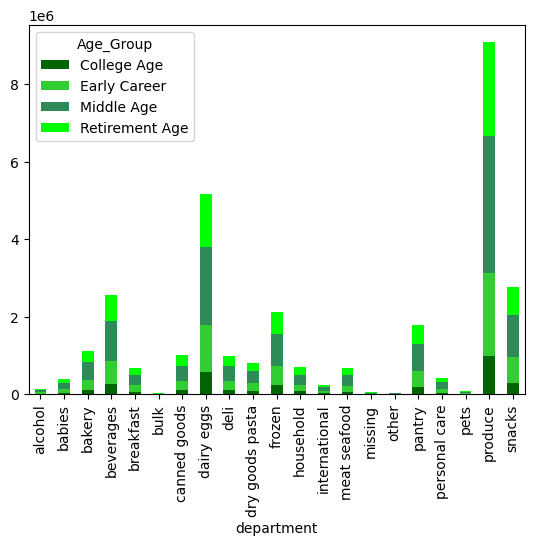

In [66]:
#creating bar graph of deparment sales by age group
age_dept_bar = age_dept.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'seagreen', 'lime'])

In [149]:
#Exporting bar graph of department sales by age group
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_bar.png'), bbox_inches = "tight")

In [68]:
#copying department sales by age group to clipboard
age_dept.to_clipboard()

In [69]:
#Creating crosstab of department sales by family status
fam_prod = pd.crosstab(df_reg['department'], df_reg['family_status'])

In [70]:
fam_prod

family_status,no children,older children,young children
department,,,
alcohol,36827,107800,0
babies,103328,0,307064
bakery,281395,839433,0
beverages,645341,1926560,0
breakfast,166432,504418,0
bulk,8000,25451,0
canned goods,251020,761054,0
dairy eggs,1294376,3882806,0
deli,253382,750452,0


In [71]:
#Creating crosstab of department sales by region
reg_prod = pd.crosstab(df_reg['department'], df_reg['Region'])

In [72]:
reg_prod

Region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,46274,39293
babies,95741,72712,131439,110500
bakery,261753,199300,349485,310290
beverages,598979,462929,807610,702383
breakfast,156155,117904,209943,186848
bulk,7929,5599,10488,9435
canned goods,237459,176936,317361,280318
dairy eggs,1212490,914616,1622007,1428069
deli,234464,178398,313613,277359


In [73]:
#Copying Department sales by region to clipboard
reg_prod.to_clipboard()

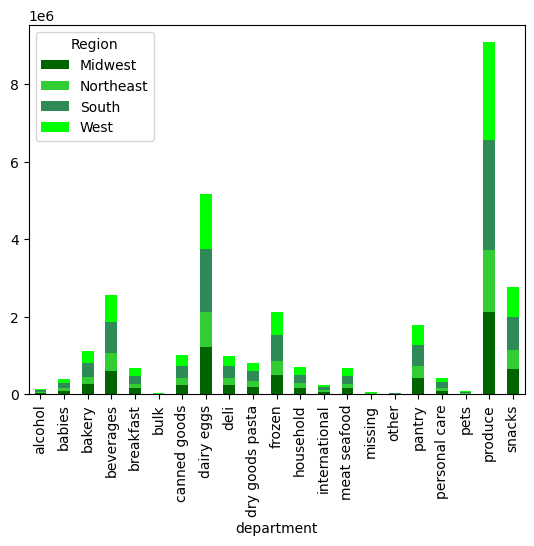

In [74]:
#creating bar graph of department sales by region
reg_prod_bar = reg_prod.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'seagreen', 'lime'] )

In [171]:
#Creating cross tab of department and income status
dept_work = pd.crosstab(df_reg['department'], df_reg['work_status'])

In [172]:
dept_work

work_status,high income,low income,mid income,retired,student
department,,,,,
alcohol,2815,48789,66327,10937,15759
babies,697,140137,196007,29218,44333
bakery,4877,389668,522834,84579,118870
beverages,9291,945214,1117171,230019,270206
breakfast,2373,244014,295223,56525,72715
bulk,5,12544,14213,3020,3669
canned goods,3856,347252,481397,71907,107662
dairy eggs,16649,1821815,2389562,395343,553813
deli,2805,357627,459294,77469,106639


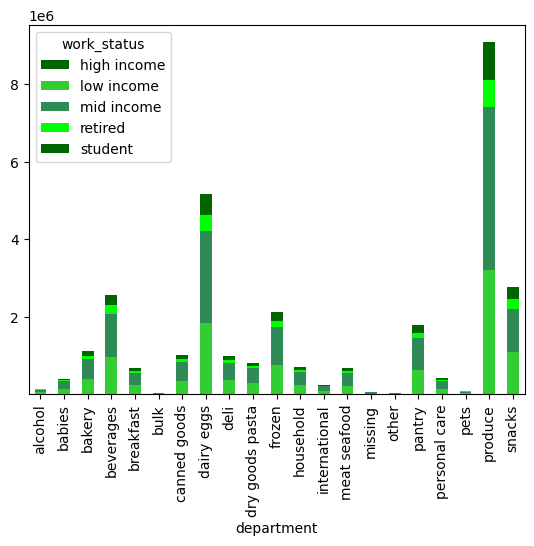

In [175]:
#creating bar graph  of crosstab
dept_work_bar = dept_work.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'seagreen', 'lime'])

In [180]:
#exporting bar graph
dept_work_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_work_bar.png'), bbox_inches = "tight" )

# 11. Crossing Days Since Last Order with New Variables

In [76]:
#Running descriptive stats on days since last order by family status
fam_dslo_desc = df_reg.groupby('family_status').agg({'days_since_last_order' : ['mean', 'min', 'max']})

In [77]:
fam_dslo_desc

days_since_last_order           
                                mean  min   max
family_status                                  
no children                10.791951  0.0  30.0
older children             10.831001  0.0  30.0
young children              9.737722  0.0  30.0

In [78]:
#copying days since last order descriptive stats by family status to clipboard
fam_dslo_desc.to_clipboard()

In [79]:
#Running days since last order descriptive stats by age group
age_dslo_desc = df_reg.groupby('Age_Group').agg({'days_since_last_order' : ['mean', 'min', 'max']})

In [80]:
age_dslo_desc

days_since_last_order           
                                mean  min   max
Age_Group                                      
College Age                10.762997  0.0  30.0
Early Career               10.834014  0.0  30.0
Middle Age                 10.821972  0.0  30.0
Retirement Age             10.791788  0.0  30.0

In [81]:
#copying dslo descriptive stats by age group to clipboard
age_dslo_desc.to_clipboard()

In [82]:
#Running dslo descriptive stats by income level
work_dslo_desc = df_reg.groupby('work_status').agg({'days_since_last_order' : ['mean', 'min', 'max']})

In [83]:
work_dslo_desc

days_since_last_order           
                             mean  min   max
work_status                                 
high income             10.094693  0.0  30.0
low income              10.861343  0.0  30.0
mid income              10.774457  0.0  30.0
retired                 10.876738  0.0  30.0
student                 10.766126  0.0  30.0

In [84]:
#copying dslo by income level to clipboard
work_dslo_desc.to_clipboard()

In [85]:
#running dslo descriptive stats by Region
reg_dslo_desc = df_reg.groupby('Region').agg({'days_since_last_order' : ['mean', 'min','max']})

In [86]:
reg_dslo_desc

days_since_last_order           
                           mean  min   max
Region                                    
Midwest               10.892736  0.0  30.0
Northeast             10.774220  0.0  30.0
South                 10.820371  0.0  30.0
West                  10.751931  0.0  30.0

In [87]:
#copying dslo descriptive stats by region to clipboard
reg_dslo_desc.to_clipboard()

# 12. Crossing Prices with New Variables

In [88]:
#replacing pricing outliers with NaN
df_reg.loc[df_reg['prices'] >1000, 'prices'] = np.nan

In [89]:
df_reg['prices'].max()

25.0

In [90]:
#running 'prices' descriptive stats by region
fam_price_desc = df_reg.groupby('family_status').agg({'prices' : ['mean', 'min','max']})

In [91]:
fam_price_desc

prices           
                    mean  min   max
family_status                      
no children     7.789550  1.0  25.0
older children  7.792857  1.0  25.0
young children  7.647681  1.0  15.0

In [92]:
#copying prices by family status descriptive stats to clipboard
fam_price_desc.to_clipboard()

In [93]:
#running 'prices' descriptive stats by age group
age_price_desc = df_reg.groupby('Age_Group').agg({'prices' : ['mean', 'min','max']})

In [94]:
age_price_desc

prices           
                    mean  min   max
Age_Group                          
College Age     7.790680  1.0  25.0
Early Career    7.782056  1.0  25.0
Middle Age      7.791529  1.0  25.0
Retirement Age  7.796715  1.0  25.0

In [95]:
#copying prices by age group to clipboard
age_price_desc.to_clipboard()

In [96]:
#running 'prices' descriptive stats by income level
work_price_desc = df_reg.groupby('work_status').agg({'prices' : ['mean', 'min','max']})

In [97]:
work_price_desc

prices           
                 mean  min   max
work_status                     
high income  7.755411  1.0  25.0
low income   7.662747  1.0  25.0
mid income   7.954829  1.0  25.0
retired      7.425941  1.0  25.0
student      7.786958  1.0  25.0

In [98]:
#copying 'prices' by income to clipboard
work_price_desc.to_clipboard()

In [99]:
#running 'prices' descriptive stats by Region
reg_price_desc = df_reg.groupby('Region').agg({'prices' : ['mean', 'min','max']})

In [100]:
reg_price_desc

prices           
               mean  min   max
Region                        
Midwest    7.792318  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.793336  1.0  25.0
West       7.791858  1.0  25.0

In [101]:
#copying 'prices' by region to clipboard
reg_price_desc.to_clipboard()

# 13. Crossing Order Hour Of Day with New Variables

In [102]:
#Creating crosstab of orders placed by hour by family status
ohod_fam = pd.crosstab(df_reg['order_hour_of_day'], df_reg['family_status'])

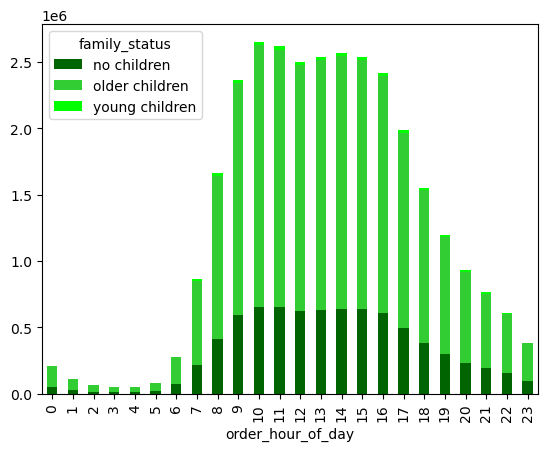

In [103]:
#creating bar grap of order hour of day by family status
ohod_fam_bar = ohod_fam.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'lime'])

In [104]:
#exporting bar graph
ohod_fam_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ohod_fam_bar.png'))

In [105]:
#creating cross tab of order hour of the day and income level
ohod_wrk = pd.crosstab(df_reg['order_hour_of_day'], df_reg['work_status'])

In [106]:
ohod_wrk

work_status,high income,low income,mid income,retired,student
order_hour_of_day,,,,,
0,516,74375,93726,16043,23382
1,505,38619,49309,8641,12547
2,511,23313,28799,5225,7843
3,324,17776,21531,3998,5167
4,320,17005,23384,4003,6051
5,482,28357,39140,6980,9459
6,816,95588,129535,21895,33179
7,3509,300148,400764,66059,92733
8,5593,588854,758454,131893,174316


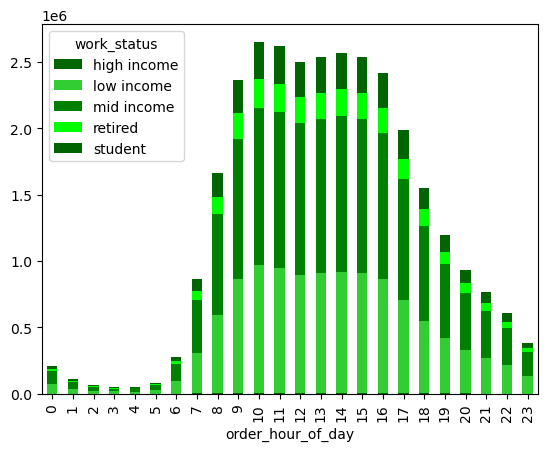

In [107]:
#creating bar graph of crosstab
ohod_wrk_bar = ohod_wrk.plot(kind = 'bar', stacked = True, color = ['darkgreen','limegreen','green','lime'])

In [108]:
#exporting bar graph
ohod_wrk_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ohod_wrk_bar.png'))

In [109]:
#creating crosstab of order hour of the day and region
ohod_reg = pd.crosstab(df_reg['order_hour_of_day'], df_reg['Region'])

In [110]:
ohod_reg

Region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,48192,36600,65725,57525
1,25879,20529,34078,29135
2,16136,11842,19359,18354
3,11298,8843,15699,12956
4,12015,9043,16280,13425
5,19061,14733,27755,22869
6,64885,49025,89746,77357
7,201794,154031,270436,236952
8,384854,294134,525112,455010


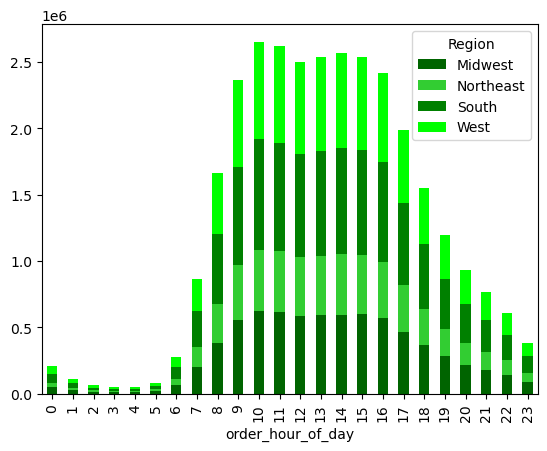

In [111]:
#creating bar graph of crosstab
ohod_reg_bar = ohod_reg.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'green', 'lime'])

In [112]:
#exporting bar graph
ohod_reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ohod_reg_bar.png'))

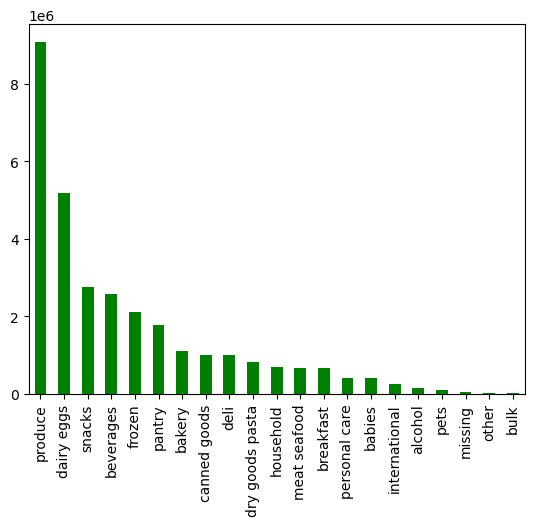

In [113]:
#creating bar graph of sales by department
dept_bar = df_reg['department'].value_counts().plot.bar(color = 'green')

In [166]:
#exporting bar graph
dept_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar.png')), bbox_inches = "tight")

In [115]:
#creating crosstab of order of day by department
hour_dep = pd.crosstab(df_reg['order_hour_of_day'], df_reg['department'])

In [116]:
hour_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,465,2317,6958,16652,4131,231,6797,33150,6573,5545,...,4739,1795,4490,521,232,12950,3115,642,65073,16877
1,293,1085,3576,9518,2218,114,3655,16828,3478,2884,...,2722,961,2277,294,129,6845,1864,416,33345,8691
2,246,616,2282,5890,1318,66,2254,10162,2142,1699,...,1784,558,1465,156,113,4163,1125,247,18986,5336
3,177,457,1734,4468,1008,49,1621,7671,1537,1221,...,1353,483,1050,122,67,3049,862,252,13729,3990
4,175,534,1824,4584,1059,46,1738,7748,1578,1379,...,1530,427,1121,143,62,3109,973,269,14664,3839
5,260,1076,2967,7108,1797,75,2742,13778,2659,2059,...,2180,672,1775,180,99,4801,1397,302,25924,6372
6,645,4794,10415,22202,6546,314,8619,49797,8667,7263,...,6569,2151,6027,588,305,15367,3980,948,84649,22541
7,2021,16310,33029,66553,20865,889,25924,154902,26410,22399,...,20036,6215,18795,1792,877,46324,11700,2389,260886,70141
8,5046,28008,61396,135182,39506,1779,50974,296832,51248,41331,...,37854,12117,35620,3244,1736,90178,21953,4298,494234,145686


In [117]:
#copying crosstab to clipboard
hour_dep.to_clipboard()

# 14. Crossing loyalty flag with New Variables

In [118]:
reg_loy = pd.crosstab(df_reg['Region'], df_reg['loyalty_flag'])

In [119]:
reg_loy

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3193773,1500240,5003549
West,2874761,1324538,4341505


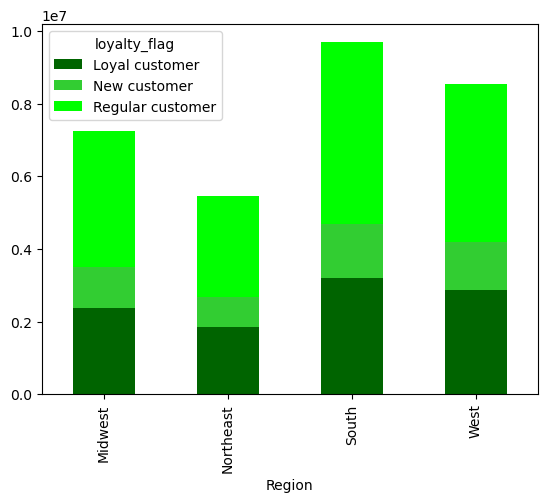

In [120]:
reg_loy_bar = reg_loy.plot(kind = 'bar', stacked = True, color = ['darkgreen', 'limegreen', 'lime'])

In [153]:
#exporting bar graph
reg_loy_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'reg_loy_bar.png')), bbox_inches = "tight")

In [122]:
#Creating crosstab of loyalty level and age group
age_loy = pd.crosstab(df_reg['Age_Group'], df_reg['loyalty_flag'])

In [123]:
age_loy

loyalty_flag,Loyal customer,New customer,Regular customer
Age_Group,,,
College Age,1143582,527077,1744535
Early Career,2375804,1112657,3761455
Middle Age,4040749,1887302,6175859
Retirement Age,2723958,1276659,4194927


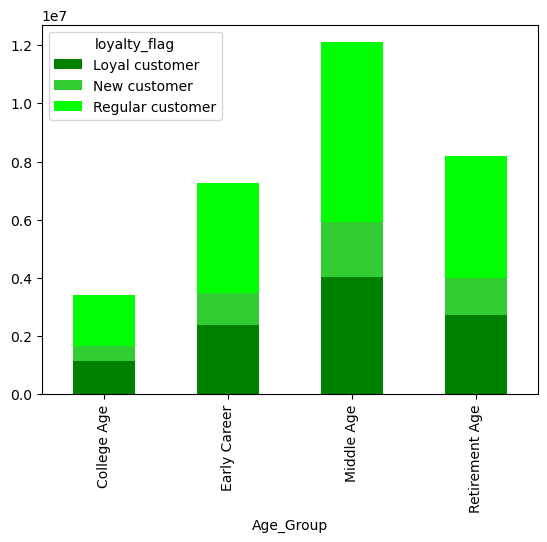

In [124]:
#creating bar graph of crosstab
age_loy_bar = age_loy.plot(kind = 'bar', stacked = True, color = ['green', 'limegreen', 'lime', 'greenyellow'])

In [154]:
#exporting bar graph
age_loy_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'Age_loy_bar.png')), bbox_inches = "tight")

In [125]:
#creating crosstab of loyalty level and income
wrk_loy = pd.crosstab(df_reg['work_status'], df_reg['loyalty_flag']) 

In [126]:
wrk_loy

loyalty_flag,Loyal customer,New customer,Regular customer
work_status,,,
high income,40341,7985,51703
low income,3619173,1743941,5635896
mid income,4717868,2135566,7253939
retired,801301,404444,1248036
student,1105410,511759,1687202


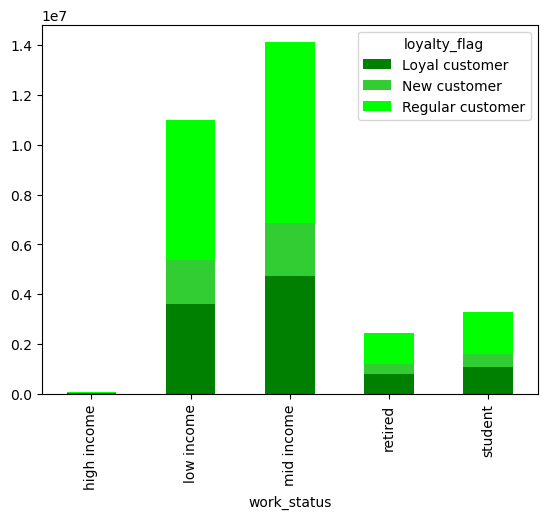

In [127]:
#creating bar graph of crosstab
wrk_loy_bar = wrk_loy.plot(kind = 'bar', stacked = True, color = ['green', 'limegreen', 'lime'])

In [158]:
#exporting graph
wrk_loy_bar.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'wrk_loy_bar.png')), bbox_inches = "tight")

In [129]:
#creating crosstab of order hour of day and loyalty status
ohod_loy = pd.crosstab(df_reg['order_hour_of_day'], df_reg['loyalty_flag'])

In [130]:
ohod_loy

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


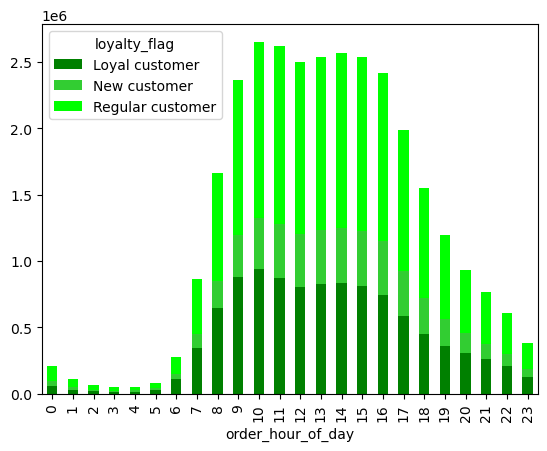

In [131]:
#creating bar graph of crosstab
ohod_loy_bar = ohod_loy.plot(kind = 'bar', stacked = True, color = ['green', 'limegreen', 'lime'])

In [133]:
#exporting bar graph
ohod_loy_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ohod_loy_bar.png'))

# 15. Exporting Final Data Set

In [134]:
#exporting dataframe
df_reg.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Cust_Ords_Prods_Regular_Customers.pkl'))